In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression


In [2]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib import pyplot
from numpy import where
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
from collections import Counter
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SVMSMOTE

from sklearn import metrics
from sklearn.datasets import make_classification


from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [4]:
plt=__import__("matplotlib.pyplot")
plt.pyplot.subplots

<function matplotlib.pyplot.subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)>

In [5]:
df = pd.read_csv("Base.csv")

In [6]:
# -1 is a missing value

(df==-1).sum()

fraud_bool                               0
income                                   0
name_email_similarity                    0
prev_address_months_count           712920
current_address_months_count          4254
customer_age                             0
days_since_request                       0
intended_balcon_amount                   0
payment_type                             0
zip_count_4w                             0
velocity_6h                              0
velocity_24h                             0
velocity_4w                              0
bank_branch_count_8w                     0
date_of_birth_distinct_emails_4w         0
employment_status                        0
credit_risk_score                      488
email_is_free                            0
housing_status                           0
phone_home_valid                         0
phone_mobile_valid                       0
bank_months_count                   253635
has_other_cards                          0
proposed_cr

In [7]:
#Replacing -1 with nan  

df.replace(-1,np.NAN,inplace =True)

In [8]:
# Deleting the prev_address_months_count since the missing values more than 70%
del df["prev_address_months_count" ]

In [9]:
df["current_address_months_count"].fillna(df["current_address_months_count"].median(),inplace = True)
df["bank_months_count"].fillna(df["bank_months_count"].median(),inplace = True)
df["credit_risk_score"].fillna(df["credit_risk_score"].mean(),inplace = True)
df["session_length_in_minutes"].fillna(df["session_length_in_minutes"].median(),inplace = True)
df["device_distinct_emails_8w"].fillna(df["device_distinct_emails_8w"].mode()[0],inplace = True)

In [10]:
df.isnull().sum()

fraud_bool                          0
income                              0
name_email_similarity               0
current_address_months_count        0
customer_age                        0
days_since_request                  0
intended_balcon_amount              0
payment_type                        0
zip_count_4w                        0
velocity_6h                         0
velocity_24h                        0
velocity_4w                         0
bank_branch_count_8w                0
date_of_birth_distinct_emails_4w    0
employment_status                   0
credit_risk_score                   0
email_is_free                       0
housing_status                      0
phone_home_valid                    0
phone_mobile_valid                  0
bank_months_count                   0
has_other_cards                     0
proposed_credit_limit               0
foreign_request                     0
source                              0
session_length_in_minutes           0
device_os   

In [11]:
df = pd.get_dummies(df, columns = ["payment_type","employment_status","housing_status","source","device_os"],drop_first=True)

In [12]:
del df["device_fraud_count"]



In [13]:
## We will try to fit different models and over sampling and under sampling techniques to get the best classifier

In [14]:
def Definedata():
    # define dataset
    X=df.drop(columns=['fraud_bool']).values
    y=df['fraud_bool'].values
    return X, y

Applying different resampling techniques and splitting the data 

## SMOTE

In [15]:
def SMOTE():
    # SMOTE for imbalanced dataset
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from sklearn.datasets import make_classification
    from imblearn.over_sampling import SMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()

# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    smt = SMOTE(random_state=0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5 ,stratify= y)

    X_train, y_train = smt.fit_resample(X_train, y_train) 
# summarize the new class distribution
    counter = Counter(y_train)
    print(counter)

    return X_train, X_test, y_train, y_test

## Borderline SMOTE

In [16]:
def BSMOTE():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import BorderlineSMOTE
    from matplotlib import pyplot
    from numpy import where
    
    X, y = Definedata()
    
# summarize class distribution
    counter = Counter(y)
    print(counter)
# transform the dataset
    Bo_smt = BorderlineSMOTE(random_state=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8,stratify= y)
    X_train, y_train = Bo_smt.fit_resample(X_train, y_train)
# summarize the new class distribution
    counter = Counter(y_train)
    print(counter)
    return X_train, X_test, y_train, y_test


## SMOTESVM 

In [17]:
def SMOTESVM():
    from collections import Counter
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SVMSMOTE
    
    from numpy import where

    X,y = Definedata()

      #Imbalanced class 

    count = Counter(y)
    print(count)


    # transform the dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,stratify= y)
    X_train, y_train = SVMSMOTE().fit_resample(X_train, y_train)
     # summarize the new class distribution
    counter = Counter(y_train)
    print(counter)
     # scatter plot of examples by class label
   
    return X_train, X_test, y_train, y_test




In [18]:
%time X_train1, X_test1, y_train1, y_test1 = SMOTE()


Counter({0: 988971, 1: 11029})
Counter({0: 494486, 1: 494486})
CPU times: total: 5.45 s
Wall time: 3.99 s


In [19]:
 X_train2, X_test2, y_train2, y_test2 = BSMOTE()

Counter({0: 988971, 1: 11029})
Counter({0: 197794, 1: 197794})


In [ ]:
%time X_train3, X_test3, y_train3, y_test3 = SMOTESVM()

In [20]:
def Models(models, X_train, X_test, y_train, y_test, title):
    model = models
    model.fit(X_train,y_train)
    
    X, y = Definedata()
    train_matrix = pd.crosstab(y_train, model.predict(X_train), rownames=['Actual'], colnames=['Predicted'])    
    test_matrix = pd.crosstab(y_test, model.predict(X_test), rownames=['Actual'], colnames=['Predicted'])
    matrix = pd.crosstab(y, model.predict(X), rownames=['Actual'], colnames=['Predicted'])
    
    f,(ax1,ax2,ax3) = plt.pyplot.subplots(1,3,sharey=True, figsize=(20, 3))
    #f = plt.figure(figsize=(20, 3))
    
    g1 = sns.heatmap(train_matrix, annot=True, fmt=".1f", cbar=False,annot_kws={"size": 16},ax=ax1)
    g1.set_title(title)
    g1.set_ylabel('Total Fraud = {}'.format(y_train.sum()), fontsize=14, rotation=90)
    g1.set_xlabel('recall score for Trainingset: {}'.format(metrics.recall_score(model.predict(X_train), y_train)))
    
    g2 = sns.heatmap(test_matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax2)
    g2.set_ylabel('Total Fraud = {}'.format(y_test.sum()), fontsize=14, rotation=90)
    g2.set_xlabel('recall score for Testingset: {}'.format(metrics.recall_score(model.predict(X_test), y_test)))
    
    g3 = sns.heatmap(matrix, annot=True, fmt=".1f",cbar=False,annot_kws={"size": 16},ax=ax3)
    g3.set_ylabel('Total Fraud = {}'.format(y.sum()), fontsize=14, rotation=90)
    g3.set_xlabel('recall score for Totalset: {}'.format(metrics.recall_score(model.predict(X), y)))
    
    plt.pyplot.show()
    return y, model.predict(X)

## Results of diff models

## Logistic

In [ ]:
title = 'LogisticRegression/SMOTE'
%time Models(LogisticRegression(),X_train1, X_test1, y_train1, y_test1, title)

In [ ]:
title = 'LogisticRegression/BSMOTE'
%time Models(LogisticRegression(),X_train2, X_test2, y_train2, y_test2, title)

In [ ]:
title = 'LogisticRegression/SVMSMOTE'
%time Models(LogisticRegression(),X_train3, X_test3, y_train3, y_test3, title)

## KNN

In [ ]:
title = 'KNeighborsClassifier/SMOTE'
%time Models(KNeighborsClassifier(n_neighbors=1),X_train1, X_test1, y_train1, y_test1, title)

In [ ]:
title = 'KNeighborsClassifier/BSMOTE'
%time Models(KNeighborsClassifier(n_neighbors=1),X_train2, X_test2, y_train2, y_test2, title)

In [ ]:
title = 'KNeighborsClassifier/SMOTESVM'
%time Models(KNeighborsClassifier(n_neighbors=1),X_train3, X_test3, y_train3, y_test3, title)

## Random Forest 

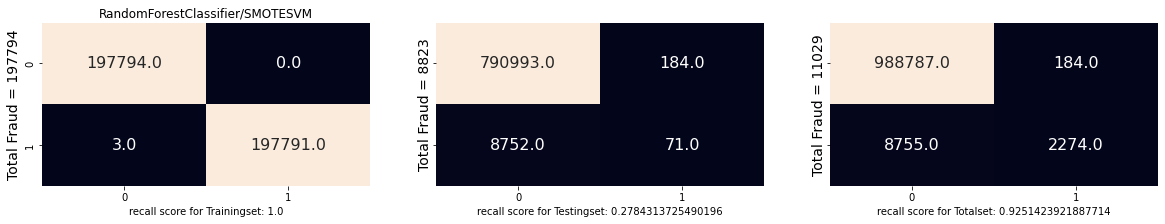

CPU times: total: 2min 29s
Wall time: 3min 45s


(array([1, 1, 1, ..., 0, 0, 0], dtype=int64),
 array([0, 0, 0, ..., 0, 0, 0], dtype=int64))

In [21]:
title = 'RandomForestClassifier/SMOTESVM'
%time Models(RandomForestClassifier(),X_train2, X_test2, y_train2, y_test2, title)

## DecisionTree 

In [ ]:
title = 'DecisionTreeClassifier/BSMOTE'
%time Models(DecisionTreeClassifier(),X_train2, X_test2, y_train2, y_test2, title)

In [ ]:
recall = cross_val_score(DecisionTreeClassifier(), X_train2, y_train2, cv=10 , scoring="recall")

In [ ]:
recall

In [ ]:
title = 'DecisionTreeClassifier/SVMSMOTE'
%time Models(DecisionTreeClassifier(),X_train3, X_test3, y_train3, y_test3, title)

In [ ]:
clf_dt = DecisionTreeClassifier()

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train2, y_train2)  #determing values for alpha - regularization parameter
ccp_alphas, impurities = path.ccp_alphas, path.impurities
   #getting the different values for alphas




In [ ]:
len(ccp_alphas)

In [ ]:
size = 2680
step = 2
ind = (list(range(2300, size, step)))
len(ind)

In [ ]:
np.where(ccp_alphas ==0.00124786459670198)

In [ ]:
ccp_alphas2 = ccp_alphas[2650:]
#for i in range(134):
    #ccp_alphas2.append(ccp_alphas[(i)*20])
 
    

In [ ]:
(ccp_alphas2) =  (ccp_alphas2)[-7:]


In [ ]:
ccp_alphas3 = ccp_alphas[130:150]

In [ ]:
ccp_alphas3

In [ ]:
clf_dts = [] #create an array of different decision trees with aplha values 

#creating a loop to print the recall of different models 

for ccp_alpha in ccp_alphas2:
    clf_dt = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    clf_dt.fit(X_train2, y_train2)
    clf_dts.append(clf_dt)

In [ ]:
clf_dts

In [ ]:
clf_dts = clf_dts[-7:]

In [ ]:
#cross_val_score(DecisionTreeClassifier(), X_train2, y_train2, cv=10 , scoring="recall")
scores = [cross_val_score(clf_dt, X_train2, y_train2, cv=10 , scoring="recall") for clf_dt in clf_dts ]


In [ ]:
scores

In [ ]:
clf_dts

In [ ]:
train_scores = [metrics.recall_score(y_train2,clf_dt.predict(X_train2)) for clf_dt in clf_dts ]
test_scores = [metrics.recall_score(y_test2,clf_dt.predict(X_test2)) for clf_dt in clf_dts ]
 


In [ ]:
len(train_scores)

In [ ]:
fig,ax = plt.pyplot.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("recall")
#ax.set_titles("Recall vs alpha for tra///ining and testing data")
ax.plot(ccp_alphas2,train_scores,label = "train" , drawstyle = "steps-post")
ax.plot(ccp_alphas2,test_scores,label = "test" , drawstyle = "steps-post")
ax.legend()
plt.pyplot.show()

In [ ]:
decision_tree = DecisionTreeClassifier(ccp_alpha=0.015218073509507116)

In [ ]:
decision_tree = decision_tree.fit(X_train2,y_train2 )

In [ ]:
y_pred=decision_tree.predict(X_test2)


In [ ]:
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

In [ ]:
print(classification_report(y_test2, y_pred))

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import scipy.stats as st
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from statsmodels.tools import add_constant as add_constant
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegressionCV #for optimal c parameter 
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import collections
from six import StringIO 
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from imblearn.under_sampling import RandomUnderSampler #undersampling 

In [ ]:
auc = metrics.roc_auc_score(y_test2, y_pred)

false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test2, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

## Random forest

In [22]:
rf = RandomForestClassifier()

In [24]:
rf = rf.fit(X_train2,y_train2)

In [26]:
y_pred=rf.predict(X_test2)


<AxesSubplot:>

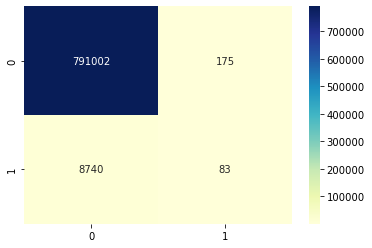

In [27]:
cm = confusion_matrix(y_test2, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

In [28]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    791177
           1       0.32      0.01      0.02      8823

    accuracy                           0.99    800000
   macro avg       0.66      0.50      0.51    800000
weighted avg       0.98      0.99      0.98    800000



## XGBoost

In [29]:
xgb = XGBClassifier()

In [37]:
xgb = xgb.fit(X_train1,y_train1)

In [38]:
y_pred=xgb.predict(X_test1)

<AxesSubplot:>

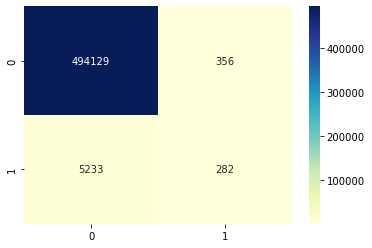

In [39]:
cm = confusion_matrix(y_test1, y_pred)
sns.heatmap(cm,annot=True,fmt='d',cmap="YlGnBu")

In [40]:
print(classification_report(y_test1, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99    494485
           1       0.44      0.05      0.09      5515

    accuracy                           0.99    500000
   macro avg       0.72      0.53      0.54    500000
weighted avg       0.98      0.99      0.98    500000

